# Dataset

www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset

About Dataset
Context
High precision and reliable wind speed forecasting is a challenge for meteorologists. Severe wind due to convective storms, causes considerable damages (large scale forest damage, outage, buildings/houses damage, etc.). Convective events such as thunderstorms, tornadoes as well as large hail, strong winds, are natural hazards that have the potential to disrupt daily life, especially over complex terrain favoring the initiation of convection. Even ordinary convective events produce severe winds which causes fatal and costly damages. Therefore, wind speed prediction is an important task to get advanced severe weather warning. This dataset contains the responses of a weather sensor that collected different weather variables such as temperatures and precipitation.

Content
The dataset contains 6574 instances of daily averaged responses from an array of 5 weather variables sensors embedded in a meteorological station. The device was located on the field in a significantly empty area, at 21M. Data were recorded from January 1961 to December 1978 (17 years). Ground Truth daily averaged precipitations, maximum and minimum temperatures, and grass minimum temperature were prov

DATE (YYYY-MM-DD)

WIND: Average wind speed [knots]

IND: First indicator value

RAIN: Precipitation Amount (mm)

IND.1: Second indicator value

T.MAX: Maximum Temperature (°C)

IND.2: Third indicator value

T.MIN: Minimum Temperature (°C)

T.MIN.G: 09utc Grass Minimum Temperature (°C)ure (°C)Temperature (°C)

www.analyticsvidhya.com/blog/2020/10/multivariate-multi-step-time-series-forecasting-using-stacked-lstm-sequence-to-sequence-autoencoder-in-tensorflow-2-0-keras/

# Imports

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import datetime

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


# Data Loading

In [6]:
df=pd.read_csv('wind_dataset.csv')

# Data Exploration

In [7]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In time series problems, it is important to convert date data to datetime format to better analyze dates. The datetime format allows me to directly manipulate date and time data; for example, I can perform operations such as sorting, determining time intervals, or trend analysis faster and more accurately.

In [9]:
df['DATE']=pd.to_datetime(df['DATE'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6513 non-null   float64       
 5   T.MAX    5953 non-null   float64       
 6   IND.2    6513 non-null   float64       
 7   T.MIN    5900 non-null   float64       
 8   T.MIN.G  6214 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


# Missing Value 

In [11]:
df.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In my time series problem, I filled the missing values ​​with df.fillna(method='ffill', inplace=True) because this method moves the previous value to the empty cell and allows me to maintain the consistency of the consecutive structures. Alternatively, I could use backfill or fixed values, but these can disrupt the flow of data over time. backfill moves the next value to the previous missing cell, but this can disrupt the flow of data and affect natural trends. Since fill methods such as fixed values ​​or averaging can also cause sudden jumps or unexpected changes in time series data, ffill preserves the flow of data best. In this way, important structures such as trend and seasonality are preserved.

In [13]:
# Eksik değerleri bir önceki geçerli değerle doldurma
df.fillna(method='ffill', inplace=True)

# Sonuçları kontrol et
print(df.isnull().sum())


DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64


# Data Visalization

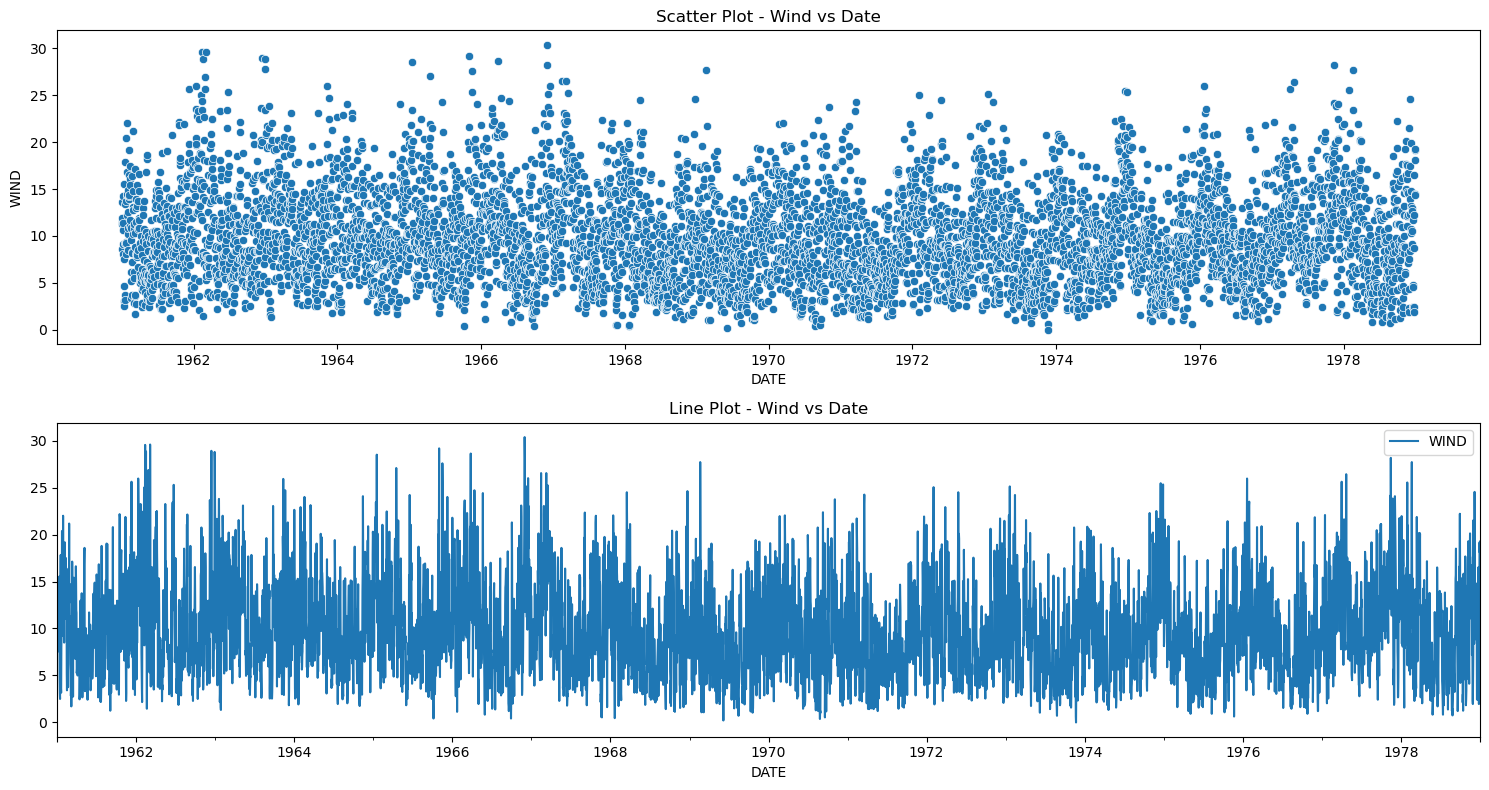

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(15, 16))  # Create a figure with 2 rows, 1 column for two plots

# First subplot: Seaborn scatter plot
sns.scatterplot(data=df, x="DATE", y="WIND", ax=ax[0])  # Add scatterplot on the first axis
ax[0].set_title('Scatter Plot - Wind vs Date')  # Add title for the scatter plot

# Second subplot: Pandas line plot
df.plot(x='DATE', y='WIND', ax=ax[1], figsize=(15, 8))  # Add line plot on the second axis
ax[1].set_title('Line Plot - Wind vs Date')  # Add title for the line plot

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plots


<Axes: >

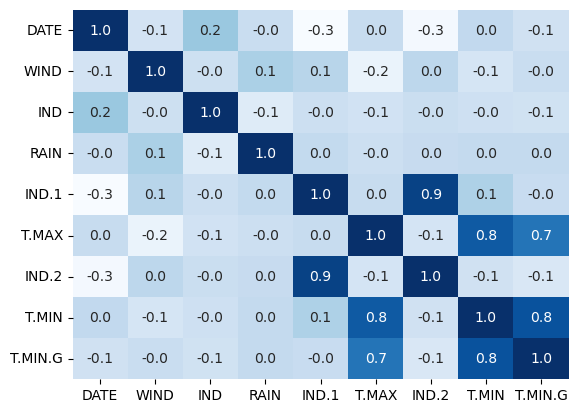

In [16]:
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

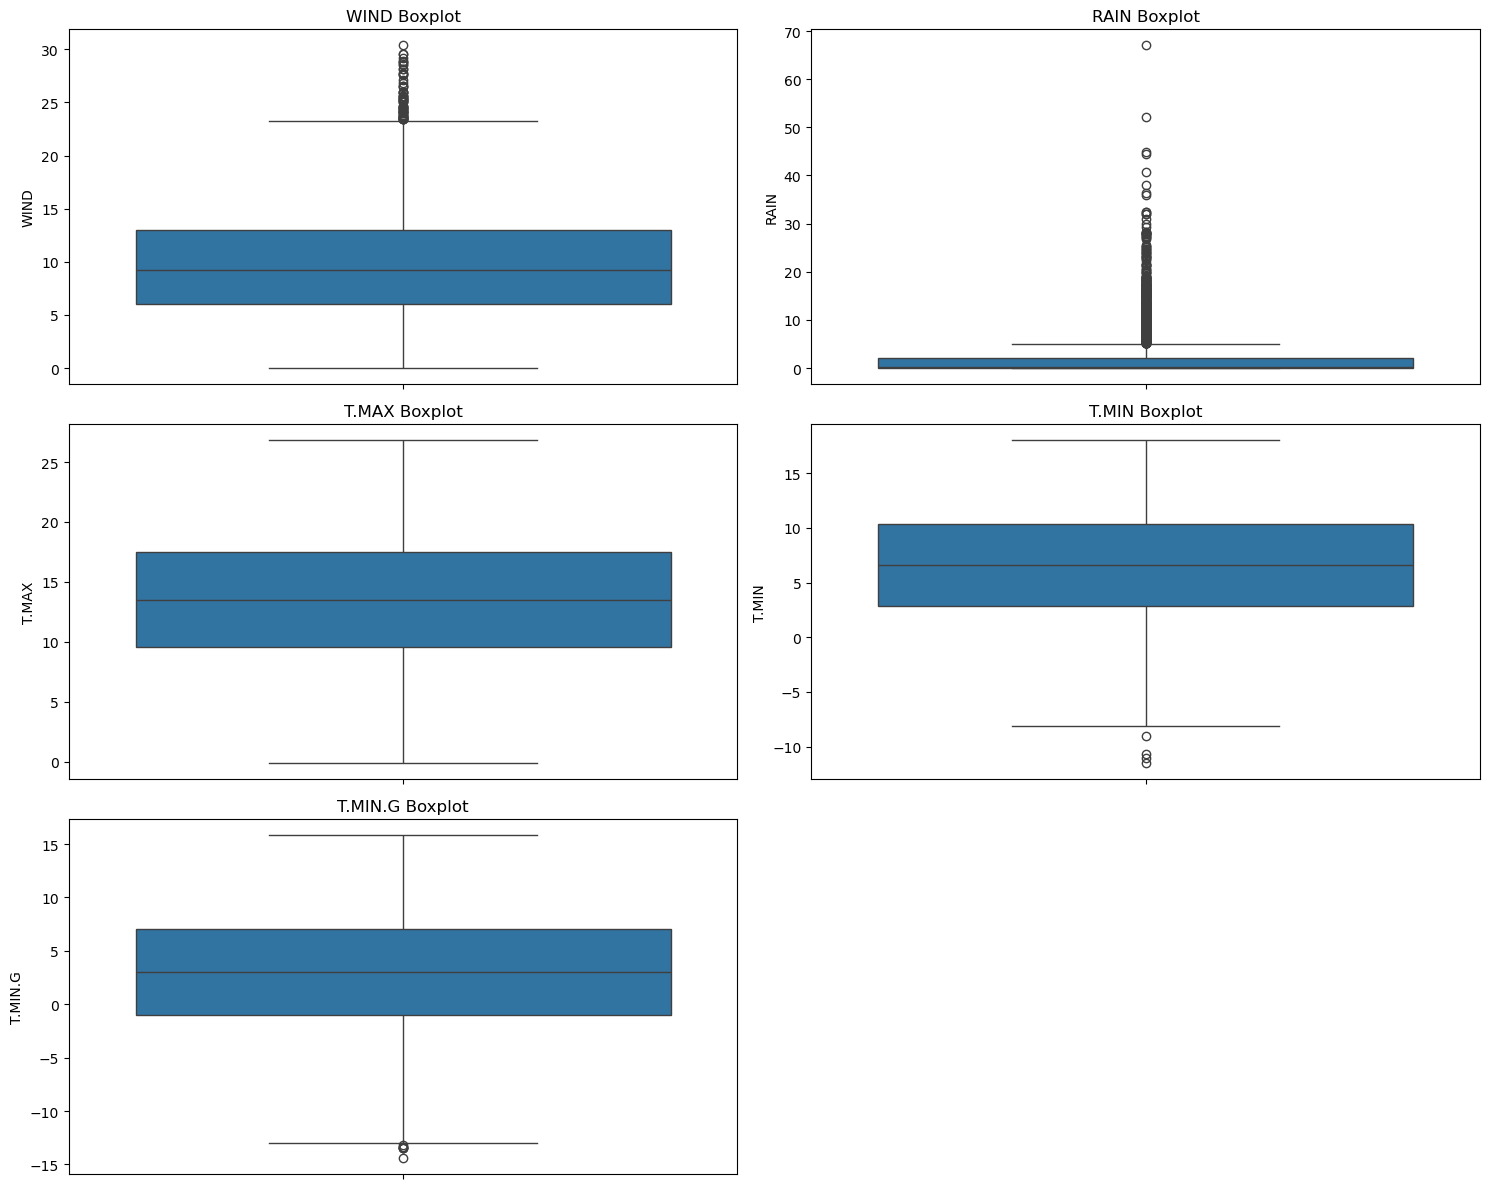

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Boxplot for WIND
sns.boxplot(data=df["WIND"], ax=axes[0, 0])  # Add WIND boxplot on the first subplot
axes[0, 0].set_title('WIND Boxplot')  # Set title for WIND boxplot

# Boxplot for RAIN
sns.boxplot(data=df["RAIN"], ax=axes[0, 1])  # Add RAIN boxplot on the second subplot
axes[0, 1].set_title('RAIN Boxplot')  # Set title for RAIN boxplot

# Boxplot for T.MAX
sns.boxplot(data=df['T.MAX'], ax=axes[1, 0])  # Add T.MAX boxplot on the third subplot
axes[1, 0].set_title('T.MAX Boxplot')  # Set title for T.MAX boxplot

# Boxplot for T.MIN
sns.boxplot(data=df['T.MIN'], ax=axes[1, 1])  # Add T.MIN boxplot on the fourth subplot
axes[1, 1].set_title('T.MIN Boxplot')  # Set title for T.MIN boxplot

# Boxplot for T.MIN.G
sns.boxplot(data=df["T.MIN.G"], ax=axes[2, 0])  # Add T.MIN.G boxplot on the fifth subplot
axes[2, 0].set_title('T.MIN.G Boxplot')  # Set title for T.MIN.G boxplot

# Hide the unnecessary subplot
fig.delaxes(axes[2, 1])  # Remove the empty subplot

# Display the plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Show the plots


Text(0.5, 1.0, 'IND.2')

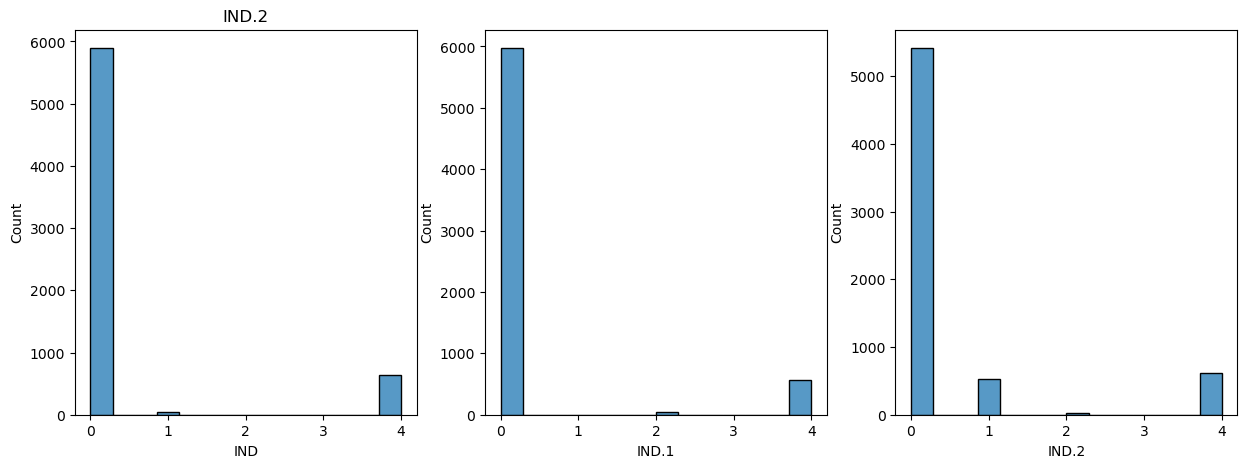

In [18]:
fig , ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=df["IND"],ax=ax[0])
ax[0].set_title("IND")

sns.histplot(data=df["IND.1"],ax=ax[1])
ax[0].set_title("IND.1")

sns.histplot(data=df["IND.2"],ax=ax[2])
ax[0].set_title("IND.2")


In [19]:
df = df.set_index('DATE')

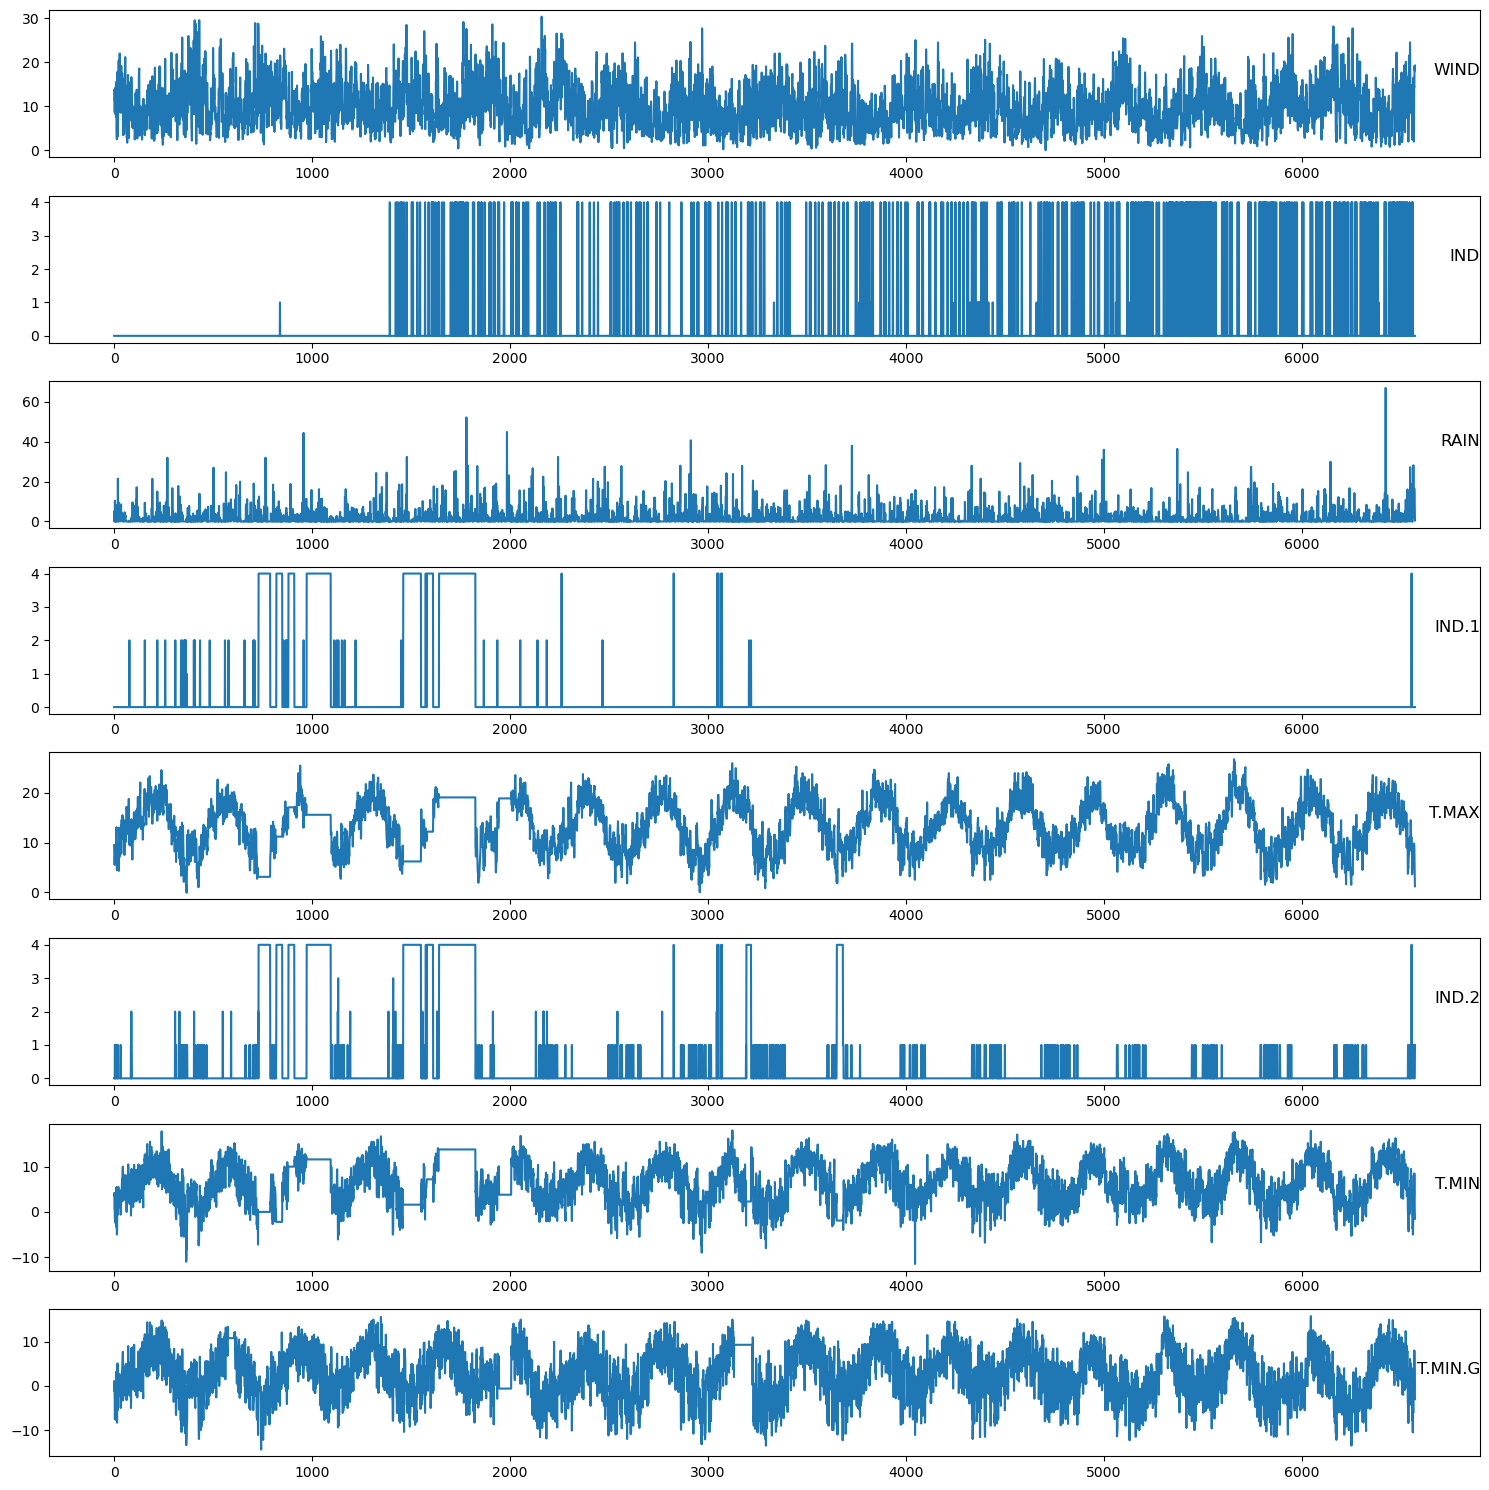

In [20]:
# Veri setini yükle
values = df.values

# Çizilecek sütunları belirt
groups = df.columns[:8]  # İlk 8 sütunu al
n_groups = len(groups)

# Her sütunu çiz
plt.figure(figsize=(15, 15))
for i, group in enumerate(groups):
    plt.subplot(n_groups, 1, i + 1)  # İndeks i+1 olmalı
    plt.plot(values[:, i])  # Doğrudan indeksi kullan
    plt.title(group, y=0.5, loc='right')  # Başlığı ayarla

plt.tight_layout()  # Alt alta çizilen grafiklerin çakışmaması için
plt.show()

In [22]:
len(df)

6574

# Train Test Split

In [23]:
# Öncelikle veri setini eğitim ve test setlerine ayıralım
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Eğitim verisini ayrıca eğitim ve doğrulama setlerine ayıralım
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)  # %0.25 doğrulama, %0.75 eğitim

# %60 eğitim, %20 doğrulama, %20 test olarak veri seti dağıtılmış olacak.

In [24]:
train_df["IND"].shape

(3944,)

In [25]:
train_df["IND"]

DATE
1968-09-13    0
1963-01-24    0
1962-03-08    0
1964-08-19    0
1974-01-14    0
             ..
1969-05-05    0
1969-03-03    0
1963-02-15    0
1962-04-20    0
1962-12-22    0
Name: IND, Length: 3944, dtype: int64

# Normalization

The advantage of using MinMaxScaler is that it scales my data between -1 and 1, making the model’s learning process faster and more effective. This is very important for deep learning models because gradient-based algorithms work more stably with features that have similar scales, thus increasing the model’s generalization ability. Additionally, MinMaxScaler provides a more balanced distribution of the data by reducing the effect of extreme values. Other normalization methods, such as Z-Score standardization, may give different results depending on the distribution of the dataset and may be affected by extreme values. Additionally, MaxAbsScaler may be limited for some cases, as it is only suitable for positive data. For these reasons, I preferred MinMaxScaler.

In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Eğitim ve test veri çerçevelerini ayır
train = train_df.copy()
test = test_df.copy()
valid= val_df.copy()

# Normalizasyon için scaler'ları saklayacağımız bir sözlük
scalers = {}

# Eğitim setindeki her sütun için normalizasyon işlemi
for column in train.columns:
    # MinMaxScaler oluştur
    scaler = MinMaxScaler(feature_range=(-1, 1))#aralık 
    
    # Sütunu normalleştir
    normalized_values = scaler.fit_transform(train[column].values.reshape(-1, 1)) # valusden çıkan np dizisini iki boyutlu yaptım
    
    # Dönüştürülen değerleri düzleştir
    normalized_values = np.reshape(normalized_values, len(normalized_values)) # 1 boyutluya tekrar döndüm
    
    # Scaler'ı sakla
    scalers[f'scaler_{column}'] = scaler
    
    # Normalleştirilmiş değerleri eğitim setine ata
    train[column] = normalized_values

# Test setindeki her sütun için normalizasyon işlemi
for column in test.columns:
    # Eğitim setinde kullanılan scaler'ı al
    scaler = scalers[f'scaler_{column}']
    
    # Test setini normalleştir
    normalized_test_values = scaler.transform(test[column].values.reshape(-1, 1))
    
    # Dönüştürülen değerleri düzleştir
    normalized_test_values = np.reshape(normalized_test_values, len(normalized_test_values))
    
    # Normalleştirilmiş değerleri test setine ata
    test[column] = normalized_test_values
for column in valid.columns:
    scaler=scalers[f'scaler_{column}']
    normalized_valid_values=scaler.transform(valid[column].values.reshape(-1,1))
    normalized_valid_values=np.reshape(normalized_valid_values,len(normalized_valid_values))
    valid[column]=normalized_valid_values

past_end and future_end are two variables that play a critical role in separating time series data. In the expression past_end = window_start + n_past, window_start represents the current location, while n_past determines the number of time steps in the past. In this case, past_end indicates where the past data ends. For example, if n_past is 5, 5 time steps of past data are retrieved at each scroll, and past_end determines the point where the past data ends. Then, we calculate where the future data ends with the expression future_end = past_end + n_future. Here, past_end represents the end of the past, while n_future determines the point where the future data ends by adding the number of time steps in the future. Thus, we first determine the past data, and then retrieve the future data after them.

In [29]:
import numpy as np

def split_series(series, n_past, n_future):
    """
    Splits the time series data into past and future sequences.

    Parameters:
    - series: The input time series data as a 2D numpy array.
    - n_past: The number of past time steps to include in the input (X).
    - n_future: The number of future time steps to predict (y).

    Returns:
    - X: A numpy array containing the past sequences.
    - y: A numpy array containing the future sequences.
    """

    X, y = list(), list()  # Initialize lists to hold input and output sequences
    
    # Iterate through the series to create sliding windows
    for window_start in range(len(series)):
        past_end = window_start + n_past  # Calculate the end index for past sequence
        future_end = past_end + n_future   # Calculate the end index for future sequence
        
        # Break if the future end exceeds the series length
        if future_end > len(series):
            break
        
        # Extract the past and future sequences
        past = series[window_start:past_end, :]  # Get past sequence
        future = series[past_end:future_end, :]  # Get future sequence
        
        # Append the sequences to the lists
        X.append(past)
        y.append(future)
    
    return np.array(X), np.array(y)  # Convert lists to numpy arrays and return them

In [31]:
train.shape

(3944, 8)

In [32]:
#series , past , features

In [ ]:
n_past = 15  # Number of past steps for the encoder
n_future = 5  # Number of future steps to predict
n_features = train.shape[1]  # Number of features in the input data


When working with time series data, it is important that the data is in this structure to support the learning process of the model. Especially for models working with sequential data such as LSTM or GRU, these shape changes are critical. In this way, the model can predict future values ​​by learning from past observations.

In [ ]:
def reshape_data(X, y, n_features):
    """Reshape the data into the required format for LSTM input."""
    X_reshaped = X.reshape((X.shape[0], X.shape[1], n_features))
    y_reshaped = y.reshape((y.shape[0], y.shape[1], n_features))
    return X_reshaped, y_reshaped

# Prepare training data
X_train, y_train = split_series(train.values, n_past, n_future)
X_train, y_train = reshape_data(X_train, y_train, n_features)

# Prepare validation data
X_valid, y_valid = split_series(valid.values, n_past, n_future)
X_valid, y_valid = reshape_data(X_valid, y_valid, n_features)

# Prepare test data
X_test, y_test = split_series(test.values, n_past, n_future)
X_test, y_test = reshape_data(X_test, y_test, n_features)

In [35]:
X_train.shape

(3925, 15, 8)

In [36]:
y_train.shape

(3925, 5, 8)

# Decoder - encoder structure in Time Series problems

The reason I prefer the encoder-decoder structure in time series problems is its ability to predict future values ​​using past data. The encoder part creates a meaningful representation from the input data, while the decoder part produces predictions for a certain time period using this representation. This structure is especially effective in cases where multi-step predictions are made, because it integrates past information to predict future steps. Alternative methods may include simple regression or classical time series modeling techniques; however, these methods may not be capable of adequately modeling the complex relationships of past data. When the encoder-decoder structure is combined with LSTM layers, it increases my capacity to learn dependencies in sequential data and allows me to make more accurate predictions. For this reason, I chose this structure as an approach suitable for the nature of time series data.

The expression RepeatVector(n) repeats the input n times. Here it repeats not only the properties of the input but also the time steps. It is used especially in an encoder-decoder structure to prepare the output of the encoder for the decoder.

In the encoder and decoder structure, the output of the encoder is of a fixed length, while the decoder predicts multiple time steps in the future. So, you need to make a prediction for n_future time steps. However, since the output from the encoder corresponds to only one time step, it is necessary to give this output as input to the decoder for n_future time steps.

So RepeatVector repeats this fixed length output from the encoder for n_future time steps. The decoder then starts making predictions for each time step

The TimeDistributed layer in Keras allows you to apply a layer (such as a Dense layer) independently to each time step of the input data. This means that when you have a sequence of data (like time series or sequences in a video), the TimeDistributed layer processes each time step separately. As a result, you can make predictions for each time step independently, which is particularly useful when working with models like LSTMs where you want to generate outputs for each element in the sequence.

The TimeDistributed layer in Keras allows me to apply a layer, like a Dense layer, independently to each time step of my input data. This means that when I work with sequences, such as time series or video data, the TimeDistributed layer processes each time step separately. As a result, I can make predictions for each time step independently. This feature is particularly useful when I'm using models like LSTMs, as it enables me to generate outputs for each element in the sequence.

In [46]:
# Model parameters
n_past = 15  # Number of past steps for the encoder
n_future = 5  # Number of future steps to predict
n_features = train.shape[1]  # Number of features in the input data

# Function to create the encoder layer
def create_encoder_layer(input_shape, units):
    """
    
    Creates an LSTM encoder layer.
    
    Args:
    - input_shape: Shape of the input data.
    - units: Number of units in the LSTM layer.
    
    Returns:
    - encoder_output: The final latent representation from the encoder part.
    - decoder_outputs: Future predicted series.
    - encoder_inputs: Input layer.
    - encoder_outputs: Outputs of the LSTM layer.
    - encoder_states: Encoder states (hidden and cell states).
    """
    encoder_inputs = tf.keras.layers.Input(shape=input_shape, name='Encoder_Input')
    encoder_lstm = tf.keras.layers.LSTM(units, return_state=True, name='Encoder_LSTM')
    encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
    encoder_states = [state_h, state_c]  # Store hidden and cell states for decoder initialization
    return encoder_inputs, encoder_outputs, encoder_states

# Function to create the decoder layer
def create_decoder_layer(encoder_outputs, encoder_states, units, n_future, n_features):
    """
    Creates a decoder LSTM layer with a TimeDistributed Dense layer for multi-step predictions.
    
    Args:
    - encoder_output: The final latent representation from the encoder part.
    - decoder_outputs: Future predicted series.
    - encoder_outputs: Output of the encoder.
    - encoder_states: Initial states for the decoder.
    - units: Number of LSTM units in the decoder.
    - n_future: Number of future time steps to predict.
    - n_features: Number of features to predict per step.
    
    Returns:
    - decoder_outputs: Outputs of the decoder.
    """
    # Repeat encoder's last output for each future time step
    decoder_inputs = tf.keras.layers.RepeatVector(n_future, name='Decoder_RepeatVector')(encoder_outputs)
    # Decoder LSTM with encoder states as initial states
    decoder_lstm = tf.keras.layers.LSTM(units, return_sequences=True, name='Decoder_LSTM')(decoder_inputs, initial_state=encoder_states)
    # TimeDistributed layer for predicting output at each time step
    decoder_outputs = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features), name='Decoder_Output')(decoder_lstm)
    return decoder_outputs

# Constructing the Seq2Seq model
encoder_inputs, encoder_outputs, encoder_states = create_encoder_layer((n_past, n_features), units=100)  # Encoder setup
decoder_outputs = create_decoder_layer(encoder_outputs, encoder_states, units=100, n_future=n_future, n_features=n_features)  # Decoder setup

# Defining the model
model_e1d1 = tf.keras.models.Model(encoder_inputs, decoder_outputs, name='Seq2Seq_Model')  # Seq2Seq model

# Model summary
model_e1d1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 15, 8)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 100),     │     43,600 │ input_layer[0][0] │
│                     │ (None, 100),      │            │                   │
│                     │ (None, 100)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 5, 100)    │          0 │ lstm[0][0]        │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 5, 100)    │     80,400 │ repeat_vector[0]… │
│                     │                   │            │ lstm[0][1],       │
│                     │                   │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, 5, 8)      │        808 │ lstm_1[0][0]      │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 124,808 (487.53 KB)

 Trainable params: 124,808 (487.53 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
encoder_outputs1

(<KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor_2>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor_3>)

In [48]:
import tensorflow as tf

# Model parameters
n_past = 15       # Number of past steps for the encoder
n_future = 5      # Number of future steps to predict
n_features = train.shape[1]  # Number of features in the input data

# Function to create an LSTM encoder layer with optional return of states
def create_encoder_layer(input_layer, units, return_sequences=True, return_state=True):
    """
    Creates an LSTM layer for the encoder with specified units.
    
    Args:
    - input_layer: The input or previous layer.
    - units: Number of LSTM units.
    - return_sequences: Whether to return the full sequence.
    - return_state: Whether to return cell states.

    Returns:
    - Tuple with encoder output and states.
    """
    lstm_layer = tf.keras.layers.LSTM(units, return_sequences=return_sequences, return_state=return_state)
    encoder_output = lstm_layer(input_layer)
    return encoder_output[0], encoder_output[1:]  # Separate the output and the states

# Function to create an LSTM decoder layer with initial states
def create_decoder_layer(input_layer, units, initial_states, return_sequences=True):
    """
    Creates an LSTM layer for the decoder with initial states.
    
    Args:
    - input_layer: The input or previous layer.
    - units: Number of LSTM units.
    - initial_states: States to initialize the LSTM layer with.
    - return_sequences: Whether to return the full sequence.

    Returns:
    - Decoder LSTM layer output.
    """
    lstm_layer = tf.keras.layers.LSTM(units, return_sequences=return_sequences)
    return lstm_layer(input_layer, initial_state=initial_states)

# Encoder layers
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))  # Define encoder input shape

# First encoder layer
encoder_output1, encoder_states1 = create_encoder_layer(encoder_inputs, units=100)

# Second encoder layer
encoder_output2, encoder_states2 = create_encoder_layer(encoder_output1, units=100, return_sequences=False)

# Prepare decoder input by repeating the last encoder output for future prediction steps
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_output2)

# Decoder layers
decoder_output1 = create_decoder_layer(decoder_inputs, units=100, initial_states=encoder_states1)  # First decoder layer with initial states
decoder_output2 = create_decoder_layer(decoder_output1, units=100, initial_states=encoder_states2)  # Second decoder layer with initial states

# Final output layer with TimeDistributed Dense for predicting multiple features
decoder_outputs = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_output2)

# Model definition
model_e2d2 = tf.keras.models.Model(encoder_inputs, decoder_outputs)

# Model summary
model_e2


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 15, 8)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 15, 100), │     43,600 │ input_layer_1[0]… │
│                     │ (None, 100),      │            │                   │
│                     │ (None, 100)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, 100),     │     80,400 │ lstm_2[0][0]      │
│                     │ (None, 100),      │            │                   │
│                     │ (None, 100)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_1     │ (None, 5, 100)    │          0 │ lstm_3[0][0]      │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 5, 100)    │     80,400 │ repeat_vector_1[… │
│                     │                   │            │ lstm_2[0][1],     │
│                     │                   │            │ lstm_2[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 5, 100)    │     80,400 │ lstm_4[0][0],     │
│                     │                   │            │ lstm_3[0][1],     │
│                     │                   │            │ lstm_3[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, 5, 8)      │        808 │ lstm_5[0][0]      │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 285,608 (1.09 MB)

 Trainable params: 285,608 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Define model parameters
n_past = 15        # Number of past steps
n_future = 5       # Number of future steps to predict
n_features = train.shape[1]  # Number of features in the dataset

# Encoder function to create LSTM layers with dropout
def create_encoder_layer(input_layer, units, dropout_rate=0.2, return_sequences=True, return_state=True):
    """
    Creates an LSTM layer with dropout applied.
    
    Args:
    - input_layer: The input layer or previous layer.
    - units: Number of LSTM units.
    - dropout_rate: Rate for Dropout layer.
    - return_sequences: Boolean to specify if the layer returns full sequence.
    - return_state: Boolean to specify if the layer returns the cell states.

    Returns:
    - Tuple with output and states for LSTM layer.
    """
    lstm_layer = tf.keras.layers.LSTM(units, return_sequences=return_sequences, return_state=return_state)(input_layer)
    dropout_layer = tf.keras.layers.Dropout(dropout_rate)(lstm_layer[0])  # Apply dropout to LSTM output
    return dropout_layer, lstm_layer[1:]

# Encoder layers
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))  # Define encoder input shape
dropout_l1, encoder_states1 = create_encoder_layer(encoder_inputs, units=200)  # First encoder LSTM layer
dropout_l2, encoder_states2 = create_encoder_layer(dropout_l1, units=200)      # Second encoder LSTM layer
dropout_l3, encoder_states3 = create_encoder_layer(dropout_l2, units=200, return_sequences=False)  # Third encoder LSTM layer, final states only

# Decoder input setup
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(dropout_l3)  # Repeat the last encoder output for decoder input

# Decoder function to create LSTM layers with dropout
def create_decoder_layer(input_layer, units, initial_states, dropout_rate=0.2):
    """
    Creates a decoder LSTM layer with initial states and dropout applied.
    
    Args:
    - input_layer: The input layer or previous layer.
    - units: Number of LSTM units.
    - initial_states: Initial states for the LSTM layer.
    - dropout_rate: Rate for Dropout layer.

    Returns:
    - Dropout layer for LSTM output.
    """
    lstm_layer = tf.keras.layers.LSTM(units, return_sequences=True)(input_layer, initial_state=initial_states)
    dropout_layer = tf.keras.layers.Dropout(dropout_rate)(lstm_layer)  # Apply dropout
    return dropout_layer

# Decoder layers
dropout_d1 = create_decoder_layer(decoder_inputs, units=200, initial_states=encoder_states3)  # First decoder LSTM layer
dropout_d2 = create_decoder_layer(dropout_d1, units=200, initial_states=encoder_states2)       # Second decoder LSTM layer

# Final output layer with TimeDistributed Dense layer
decoder_outputs = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(dropout_d2)

# Define the final model
model = tf.keras.models.Model(encoder_inputs, decoder_outputs)

# Model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 15, 8)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ [(None, 15, 200), │    167,200 │ input_layer_2[0]… │
│                     │ (None, 200),      │            │                   │
│                     │ (None, 200)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 15, 200)   │          0 │ lstm_6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ [(None, 15, 200), │    320,800 │ dropout[0][0]     │
│                     │ (None, 200),      │            │                   │
│                     │ (None, 200)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 15, 200)   │          0 │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ [(None, 200),     │    320,800 │ dropout_1[0][0]   │
│                     │ (None, 200),      │            │                   │
│                     │ (None, 200)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 200)       │          0 │ lstm_8[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_2     │ (None, 5, 200)    │          0 │ dropout_2[0][0]   │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 5, 200)    │    320,800 │ repeat_vector_2[… │
│                     │                   │            │ lstm_8[0][1],     │
│                     │                   │            │ lstm_8[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 5, 200)    │          0 │ lstm_9[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_10 (LSTM)      │ (None, 5, 200)    │    320,800 │ dropout_3[0][0],  │
│                     │                   │            │ lstm_7[0][1],     │
│                     │                   │            │ lstm_7[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 5, 200)    │          0 │ lstm_10[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_2  │ (None, 5, 8)      │      1,608 │ dropout_4[0][0]   │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,452,008 (5.54 MB)

 Trainable params: 1,452,008 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

# LearningRateScheduler , EarlyStopping

By using learning rate scheduling, I aimed to gradually decrease the learning rate in each epoch. This helps my model to perform better during the training process because when the learning rate decreases over time, the model can make more precise adjustments and better approach local minima. I also implemented the early stopping mechanism. This way, I monitored the validation loss and paused my model to prevent over-learning. If there is no improvement in the validation loss for a certain period of time (20 epochs, which I specify as patience), the training stops and the weights of the best model are restored. These two methods together form an important strategy to increase the overall performance of my model and reduce the risk of overfitting.

In [ ]:
# Learning rate scheduling to reduce the learning rate over epochs
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.98 ** x)  # This callback reduces the learning rate by multiplying it by 0.98 for each epoch.

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=20,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the weights of the best model
)


When compiling my model, I chose the Adam optimization algorithm to optimize the learning process and the Huber loss function to minimize the losses. The Adam algorithm was effective in this choice because it automatically adjusts the learning rate and allows me to get good results quickly. In addition, the Huber loss is not affected by extreme values ​​since it is based on both the squared error and the absolute error, which helps my model to make more robust and reliable predictions. The reason I did not choose other optimization algorithms or loss functions is that I know from experience that these two perform best on my particular dataset and problem; for example, a simple optimization algorithm like SGD can give slower and more unstable results, while the MSE loss can be affected by extreme values.

In [51]:
# Compile the model for the first trial
model_e1d1.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Using Adam optimizer for training
    loss=tf.keras.losses.Huber()  # Huber loss function for robust regression
)

# Train the model for the first trial
history_e1d1 = model_e1d1.fit(
    X_train, 
    y_train, 
    epochs=100,  # Maximum number of epochs to train
    validation_data=(X_valid, y_valid),  # Validation data for monitoring
    batch_size=32,  # Number of samples per gradient update
    verbose=2,  # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    callbacks=[reduce_lr, early_stopping]  # Adding the defined callbacks for learning rate reduction and early stopping
)


Epoch 1/100
123/123 - 6s - 51ms/step - loss: 0.0926 - val_loss: 0.0789 - learning_rate: 0.0010
Epoch 2/100
123/123 - 1s - 8ms/step - loss: 0.0849 - val_loss: 0.0795 - learning_rate: 9.8000e-04
Epoch 3/100
123/123 - 1s - 8ms/step - loss: 0.0848 - val_loss: 0.0787 - learning_rate: 9.6040e-04
Epoch 4/100
123/123 - 1s - 8ms/step - loss: 0.0847 - val_loss: 0.0788 - learning_rate: 9.4119e-04
Epoch 5/100
123/123 - 1s - 8ms/step - loss: 0.0847 - val_loss: 0.0792 - learning_rate: 9.2237e-04
Epoch 6/100
123/123 - 1s - 8ms/step - loss: 0.0847 - val_loss: 0.0788 - learning_rate: 9.0392e-04
Epoch 7/100
123/123 - 1s - 7ms/step - loss: 0.0847 - val_loss: 0.0786 - learning_rate: 8.8584e-04
Epoch 8/100
123/123 - 1s - 8ms/step - loss: 0.0846 - val_loss: 0.0788 - learning_rate: 8.6813e-04
Epoch 9/100
123/123 - 1s - 8ms/step - loss: 0.0846 - val_loss: 0.0788 - learning_rate: 8.5076e-04
Epoch 10/100
123/123 - 1s - 8ms/step - loss: 0.0846 - val_loss: 0.0786 - learning_rate: 8.3375e-04
Epoch 11/100
123/123 -

In [52]:
# Compile the model for the second trial
model_e2d2.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Using Adam optimizer for training
    loss=tf.keras.losses.Huber()  # Huber loss function for robust regression
)

# Train the model for the second trial
history_e2d2 = model_e2d2.fit(
    X_train, 
    y_train, 
    epochs=100,  # Maximum number of epochs to train
    validation_data=(X_valid, y_valid),  # Validation data for monitoring
    batch_size=32,  # Number of samples per gradient update
    verbose=2,  # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    callbacks=[reduce_lr, early_stopping]  # Adding the defined callbacks for learning rate reduction and early stopping
)


Epoch 1/100
123/123 - 9s - 74ms/step - loss: 0.0912 - val_loss: 0.0793 - learning_rate: 0.0010
Epoch 2/100
123/123 - 2s - 14ms/step - loss: 0.0849 - val_loss: 0.0787 - learning_rate: 9.8000e-04
Epoch 3/100
123/123 - 2s - 13ms/step - loss: 0.0849 - val_loss: 0.0790 - learning_rate: 9.6040e-04
Epoch 4/100
123/123 - 2s - 14ms/step - loss: 0.0847 - val_loss: 0.0788 - learning_rate: 9.4119e-04
Epoch 5/100
123/123 - 2s - 14ms/step - loss: 0.0847 - val_loss: 0.0789 - learning_rate: 9.2237e-04
Epoch 6/100
123/123 - 2s - 14ms/step - loss: 0.0847 - val_loss: 0.0789 - learning_rate: 9.0392e-04
Epoch 7/100
123/123 - 2s - 15ms/step - loss: 0.0847 - val_loss: 0.0788 - learning_rate: 8.8584e-04
Epoch 8/100
123/123 - 2s - 17ms/step - loss: 0.0846 - val_loss: 0.0786 - learning_rate: 8.6813e-04
Epoch 9/100
123/123 - 2s - 15ms/step - loss: 0.0846 - val_loss: 0.0791 - learning_rate: 8.5076e-04
Epoch 10/100
123/123 - 2s - 15ms/step - loss: 0.0847 - val_loss: 0.0787 - learning_rate: 8.3375e-04
Epoch 11/100


In [103]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),  # Using Adam optimizer for effective training
              loss=tf.keras.losses.Huber())  # Huber loss function for robustness against outliers

# Train the model
history_e3d3 = model.fit(
    X_train,  # Training data
    y_train,  # Target data for training
    epochs=200,  # Total epochs to run
    validation_data=(X_valid, y_valid),  # Data to evaluate the model during training
    batch_size=8,  # Number of samples per gradient update
    verbose=2,  # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    callbacks=[reduce_lr, early_stopping]  # Adding callbacks for dynamic learning rate adjustment and early stopping
)


Epoch 1/200
491/491 - 25s - 51ms/step - loss: 2.2818 - val_loss: 4.0493 - learning_rate: 0.0010
Epoch 2/200
491/491 - 15s - 30ms/step - loss: 2.2093 - val_loss: 4.1473 - learning_rate: 9.8000e-04
Epoch 3/200
491/491 - 16s - 33ms/step - loss: 2.2035 - val_loss: 3.9947 - learning_rate: 9.6040e-04
Epoch 4/200
491/491 - 16s - 32ms/step - loss: 2.2013 - val_loss: 4.0976 - learning_rate: 9.4119e-04
Epoch 5/200
491/491 - 16s - 32ms/step - loss: 2.2028 - val_loss: 3.9982 - learning_rate: 9.2237e-04
Epoch 6/200
491/491 - 15s - 31ms/step - loss: 2.2012 - val_loss: 4.2920 - learning_rate: 9.0392e-04
Epoch 7/200
491/491 - 16s - 32ms/step - loss: 2.2030 - val_loss: 4.0892 - learning_rate: 8.8584e-04
Epoch 8/200
491/491 - 16s - 32ms/step - loss: 2.1998 - val_loss: 4.3124 - learning_rate: 8.6813e-04
Epoch 9/200
491/491 - 15s - 30ms/step - loss: 2.2009 - val_loss: 4.2046 - learning_rate: 8.5076e-04
Epoch 10/200
491/491 - 15s - 30ms/step - loss: 2.2003 - val_loss: 4.0280 - learning_rate: 8.3375e-04
Epo

In [105]:
pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)
pred_e3d3=model_e2d2.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


This code snippet is used to transform my model’s predictions and target values ​​back to their original scales. First, I get the scaler for each column. Then, I inverse transform my predictions (pred_e1d1, pred_e2d2, pred_e3d3) using these scalers, so that my predictions become real-world values. Finally, I inverse transform the target values ​​in the training and test datasets in the same way, so that they also correspond to their original scales. This process is an important step when evaluating the performance of my model and interpreting the results.

In [107]:
# Inverse transforming predictions and target values using the scaler for each column
for index, column in enumerate(train_df.columns):
    # Retrieve the corresponding scaler for the column
    scaler = scalers[f'scaler_{column}']  # Using f-string to access the correct scaler
    
    # Inverse transform the predictions
    pred_e1d1[:, :, index] = scaler.inverse_transform(pred_e1d1[:, :, index])
    pred_e2d2[:, :, index] = scaler.inverse_transform(pred_e2d2[:, :, index])
    pred_e3d3[:, :, index] = scaler.inverse_transform(pred_e3d3[:, :, index])
    
    # Inverse transform the training and test data
    y_train[:, :, index] = scaler.inverse_transform(y_train[:, :, index])
    y_test[:, :, index] = scaler.inverse_transform(y_test[:, :, index])


It is designed to calculate and print the Mean Absolute Error (MAE) values ​​for each column in the dataset, day by day.

# Models Evaluating

I chose MAE over other alternatives, such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE), because it is more robust to outliers. While MSE and RMSE square the errors, which can disproportionately affect the results when there are significant outliers, MAE treats all errors equally. This makes it a better choice when I want a clear and interpretable measure of prediction accuracy that is less sensitive to extreme values.

In [56]:
from sklearn.metrics import mean_absolute_error

# Looping through all columns to calculate MAE values
for index, column in enumerate(train_df.columns):
    print(column)  # Printing the column name

    # Loop for days
    for day in range(1, 6):
        print(f"Day {day}:")
        
        # Calculating MAE and printing
        mae_e1d1 = mean_absolute_error(y_test[:, day - 1, index], pred_e1d1[:, day - 1, index])
        mae_e2d2 = mean_absolute_error(y_test[:, day - 1, index], pred_e2d2[:, day - 1, index])
        mae_e3d3 = mean_absolute_error(y_test[:, day - 1, index], pred_e3d3[:, day - 1, index])
        
        print(f"MAE-E1D1: {mae_e1d1:.4f}, MAE-E2D2: {mae_e2d2:.4f}, MAE-E3D3: {mae_e3d3:.4f}")  # 4 decimal places
        print()  # Leaving a blank line

    print()  # Leaving a blank line between each column


WIND
Day 1:
MAE-E1D1: 4.0109, MAE-E2D2: 4.0065, MAE-E3D3: 4.0065

Day 2:
MAE-E1D1: 4.0220, MAE-E2D2: 3.9977, MAE-E3D3: 3.9977

Day 3:
MAE-E1D1: 4.0205, MAE-E2D2: 3.9923, MAE-E3D3: 3.9923

Day 4:
MAE-E1D1: 4.0250, MAE-E2D2: 3.9969, MAE-E3D3: 3.9969

Day 5:
MAE-E1D1: 4.0232, MAE-E2D2: 4.0030, MAE-E3D3: 4.0030


IND
Day 1:
MAE-E1D1: 0.6034, MAE-E2D2: 0.6235, MAE-E3D3: 0.6235

Day 2:
MAE-E1D1: 0.6115, MAE-E2D2: 0.6155, MAE-E3D3: 0.6155

Day 3:
MAE-E1D1: 0.6110, MAE-E2D2: 0.6104, MAE-E3D3: 0.6104

Day 4:
MAE-E1D1: 0.6146, MAE-E2D2: 0.6108, MAE-E3D3: 0.6108

Day 5:
MAE-E1D1: 0.6174, MAE-E2D2: 0.6168, MAE-E3D3: 0.6168


RAIN
Day 1:
MAE-E1D1: 2.2724, MAE-E2D2: 2.7308, MAE-E3D3: 2.7308

Day 2:
MAE-E1D1: 2.3293, MAE-E2D2: 2.5496, MAE-E3D3: 2.5496

Day 3:
MAE-E1D1: 2.2941, MAE-E2D2: 2.5188, MAE-E3D3: 2.5188

Day 4:
MAE-E1D1: 2.3424, MAE-E2D2: 2.5863, MAE-E3D3: 2.5863

Day 5:
MAE-E1D1: 2.4068, MAE-E2D2: 2.6807, MAE-E3D3: 2.6807


IND.1
Day 1:
MAE-E1D1: 0.5009, MAE-E2D2: 0.5174, MAE-E3D3: 0.5174

D

# Save the Models

In [ ]:
model_filenames = {
    'pred_e1d1': 'pred_e1d1.pkl',
    'pred_e2d2': 'pred_e2d2.pkl',
    'pred_e3d3': 'pred_e3d3.pkl'
}

# Save each model
for model_name, filename in model_filenames.items():
    with open(filename, 'wb') as file:
        pickle.dump(eval(model_name), file)  # Use eval to get the variable by name

# Load the models

In [ ]:

for model_name, filename in model_filenames.items():
    with open(filename, 'rb') as file:
        globals()[model_name] = pickle.load(file)  # Use globals to set the variable name